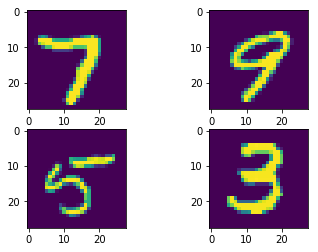

In [2]:
# task 1 : train cnn model 
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)
# get dataset
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')#transfrom 2D data to 4D
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
y_Train = np_utils.to_categorical(y_Train)
y_Test = np_utils.to_categorical(y_Test)

f,ax =plt.subplots(2,2)# draw the example of data
ax[0,0].imshow(x_Train[42352].reshape(28,28))
ax[0,1].imshow(x_Train[43543].reshape(28,28))
ax[1,0].imshow(x_Train[18342].reshape(28,28))
ax[1,1].imshow(x_Train[25685].reshape(28,28))
#plt.show()

In [3]:

from tensorflow.keras import layers,models
model = models.Sequential() # create 2 concolutional layer CNN model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 
train_history=model.fit(x=x_Train4D_normalize, y=y_Train, 
                        epochs=5, validation_data=(x_Test4D_normalize, y_Test))# train data

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 31s 517us/sample - loss: 0.1484 - accuracy: 0.9547 - val_loss: 0.0485 - val_accuracy: 0.9849
Epoch 2/5
60000/60000 [==============================] - 37s 617us/sample - loss: 0.0476 - accuracy: 0.9850 - val_loss: 0.0396 - val_accuracy: 0.9865
Epoch 3/5
60000/60000 [==============================] - 32s 531us/sample - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0329 - val_accuracy: 0.9887
Epoch 4/5
60000/60000 [==============================] - 33s 550us/sample - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0374 - val_accuracy: 0.9887
Epoch 5/5
60000/60000 [==============================] - 31s 516us/sample - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0374 - val_accuracy: 0.9896


10000/1 - 1s - loss: 0.0187 - accuracy: 0.9896
0.9896


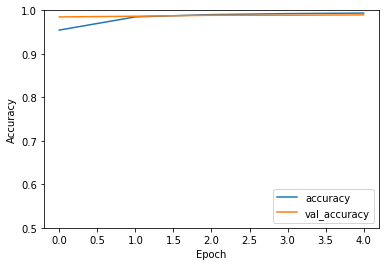

In [5]:
plt.plot(train_history.history['accuracy'], label='accuracy')
plt.plot(train_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_Test4D_normalize,  y_Test, verbose=2)
print(test_acc)

7
0.9997552


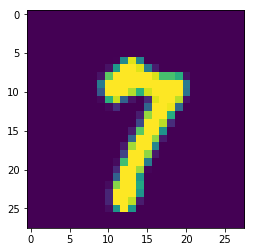

In [58]:
import random
randomimage = x_Train[random.randint(0,len(x_Train))]# randomly choose a data and check the model
plt.imshow(randomimage)
randomimage_input=randomimage.reshape(1,28,28,1).astype('float32')/255.0
outcome=model.predict(randomimage_input)
#print(outcome)
def get_result(outcome):
    result = 0
    maxpro = 0
    for pro in range(len(outcome[0])):
        if outcome[0][pro] >= maxpro:
            maxpro = outcome[0][pro]
            result = pro
    return result,maxpro
result,maxpro = get_result(outcome)
print(result)
print(maxpro)

In [108]:
# task 2: adversarial
import tensorflow as tf
import keras.backend as K
loss_object = tf.keras.losses.CategoricalCrossentropy()# loss function
def create_adversarial_pattern(input_image, input_label):# use FDSM 
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    loss = loss_object(input_label, prediction)
    #print(loss)
  # Get the gradients of the loss to the input image.
  gradient = tape.gradient(loss, input_image)
  #print(gradient)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

tf.Tensor([0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


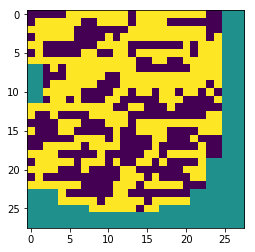

In [109]:
# Get the input label of the image.
index = 2 # choose a different number initial
image = tf.convert_to_tensor(tf.cast(randomimage.reshape(1,28,28,1), tf.float32)/255)# chande data from numpy to tensor
image = tf.image.resize(image, [28,28])
#image = image[None, ...]
#print(outcome.shape[-1])
label = tf.one_hot(index, outcome.shape[-1])
print(label)
perturbations = create_adversarial_pattern(image, label)

per = perturbations.numpy()
#print(per)
plt.imshow(per.reshape(28,28))# print perturbation

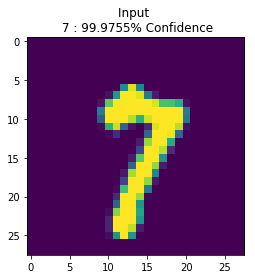

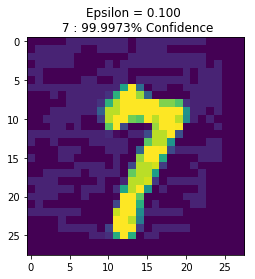

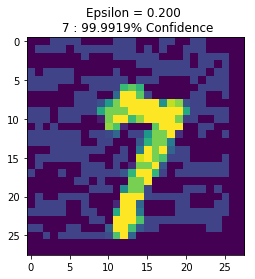

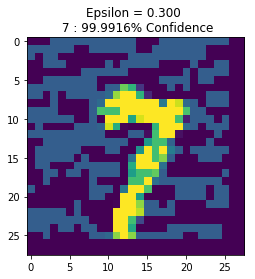

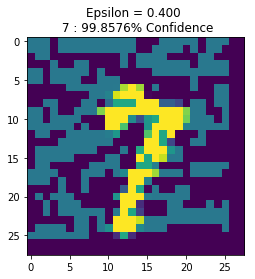

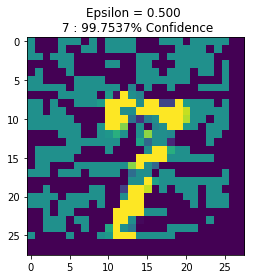

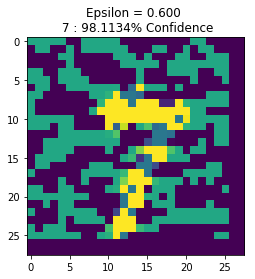

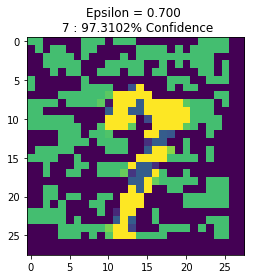

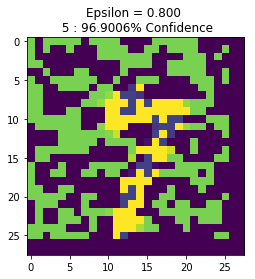

In [110]:

def display_images(image, description):
  result,maxpro = get_result(model.predict(image))
  #print(tf.image.resize(image, [28,28]))
  plt.figure()
  im = image.numpy()
  plt.imshow(im.reshape(28,28))
  plt.title('{} \n {} : {:.4f}% Confidence'.format(description,
                                                   result, maxpro*100))
  plt.show()

epsilons = [0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]
adv_x = image 
pertu = perturbations
preresult = result
for i, eps in enumerate(epsilons):
  adv_x = image + eps*pertu
  adv_x = tf.clip_by_value(adv_x, 0, 1)
  output =  model.predict(adv_x)
  result,maxpro = get_result(model.predict(adv_x))
  pertu = create_adversarial_pattern(adv_x, label)#add perturbations
  display_images(adv_x, descriptions[i])
  if result != preresult: # when predict change, output the adversial input
     break
  else:
     preresult = result

Text(0.5,1,'origin output:7--> adv output:5 ')

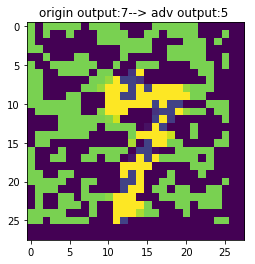

In [111]:
adv = adv_x.numpy().reshape(28,28) # show the adv picture
result0,maxpro0 = get_result(outcome)
outcome1 = model.predict(adv_x)
result1,maxpro1 = get_result(outcome1)
plt.figure()
plt.imshow(adv)
plt.title('origin output:{}--> adv output:{} '.format(result0,result1))